### Load Libraries

In [52]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Read in Data

In [5]:
nyc_copy = pd.read_csv('nyc_copy.csv')
nyc_copy.shape

(38511, 16)

In [16]:
# Create a new category that is either 1 or 0 depending on how much the price of the listing is
# 1 = low, 0 = high
nyc_copy.loc[nyc_copy['price'] > 300, 'Category'] = 0
nyc_copy.loc[nyc_copy['price'] <= 300, 'Category'] = 1

In [17]:
nyc_copy.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,4.342945e-10,0.954243,2018-10-19,-0.677781,0.778151,2.562293,1.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,4.342945e-10,1.653213,2019-05-21,-0.420216,0.301030,2.550228,1.0


### Gather Data

In [19]:
# Trim to data of interest
vars_interest = pd.DataFrame(nyc_copy, columns = ['Category','minimum_nights', 'number_of_reviews',
                                  'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
                                 'room_type', 'neighbourhood_group', 'neighbourhood'] )

# Convert to dummy variables 
# Get dummy variables for categorical data:
# neighbourhood may get removed since it's 200+ variables
vars_final = pd.get_dummies(vars_interest, columns= ['room_type','neighbourhood_group', 'neighbourhood'], drop_first = True)

In [24]:
# Prepare for regression
# Gather predictors 
X = vars_final.drop('Category', axis=1)
X

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,4.342945e-10,9.542425e-01,-6.777807e-01,7.781513e-01,2.562293e+00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.342945e-10,1.653213e+00,-4.202164e-01,3.010300e-01,2.550228e+00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.342945e-10,2.431364e+00,6.665180e-01,4.342945e-10,2.287802e+00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000000e+00,9.542425e-01,-1.000000e+00,4.342945e-10,-9.000000e+00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.771213e-01,1.869232e+00,-2.291480e-01,4.342945e-10,2.110590e+00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38506,4.342945e-10,4.342945e-10,4.342945e-10,4.342945e-10,2.167317e+00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38507,4.342945e-10,4.342945e-10,4.342945e-10,7.781513e-01,2.530200e+00,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38508,4.342945e-10,4.342945e-10,4.342945e-10,4.342945e-10,1.939519e+00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,4.342945e-10,3.010300e-01,3.010300e-01,4.342945e-10,1.602060e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Gather predicted variable (price) and log transform it
y = pd.DataFrame(nyc_copy, columns = ['Category'])
y = y['Category']

### Perform Logistic Regression

In [53]:
x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [56]:
y_pred = model.predict(x_test)

In [58]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9439106725525838
0.9430092171881085


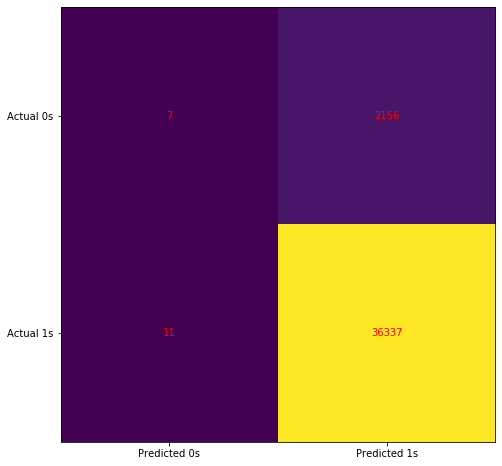

In [61]:
# Generate and plot the confusion matrix
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.00      0.01       439
         1.0       0.94      1.00      0.97      7264

    accuracy                           0.94      7703
   macro avg       0.72      0.50      0.49      7703
weighted avg       0.92      0.94      0.92      7703



### Perform Random Forest